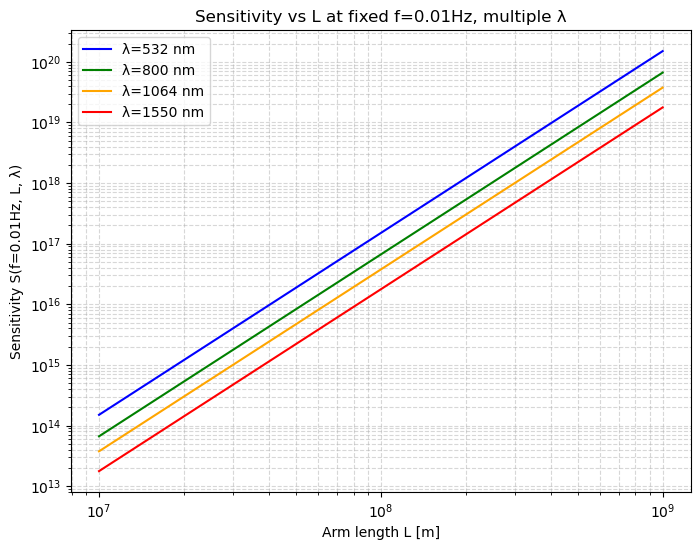

In [4]:
import numpy as np
import matplotlib.pyplot as plt

c = 3e8
f = np.logspace(-4, 0, 300)   # Hz
L = np.logspace(7, 9, 200)    # m
F, LL = np.meshgrid(f, L)

def sensitivity(f, L, lam):
    f_star = c / (2 * np.pi * L) * (lam / L)
    return (1/L) * (1 + (f/f_star)**2)

# 多个波长
lambdas = [532e-9, 800e-9, 1064e-9, 1550e-9]
colors = ["blue", "green", "orange", "red"]

plt.figure(figsize=(8,6))

for lam, col in zip(lambdas, colors):
    S = sensitivity(F, LL, lam)
    # 在某个截面（比如 f=1e-2 Hz）上比较 L-λ 的关系
    idx = np.argmin(np.abs(f-1e-2))  
    plt.loglog(L, S[:, idx], color=col, label=f"λ={lam*1e9:.0f} nm")

plt.xlabel("Arm length L [m]")
plt.ylabel("Sensitivity S(f=0.01Hz, L, λ)")
plt.title("Sensitivity vs L at fixed f=0.01Hz, multiple λ")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()
